In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
sn.set()
import matplotlib.font_manager as fm
fl = fm.FontProperties(fname ="C:\Windows\Fonts\malgun.ttf").get_name()
plt.rc('font',family=fl)
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats.stattools as tools
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.compat import lzip
import statsmodels.stats as sm_stats
import statsmodels.stats.outliers_influence as oi
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.stats.outliers_influence as oi
import statsmodels.stats as sm_stats

In [3]:
df=pd.read_csv('data5.csv',encoding="UTF-8",index_col=0)
df.head(10)

,2010crime,2010population,2010grand,2010population_density,2010foreigner,2010drink,2010smoke,2010academe,2010grdp,2011crime,...,2015grdp,2016crime,2016population,2016grand,2016population_density,2016foreigner,2016drink,2016smoke,2016academe,2016grdp
지역/연도,,,,,,,,,,,,,,,,,,,,,
서울/강남,37863,570095,44095,14418,12328,11.3,19.2,3.2,4601,38915,...,5414,14152,567115,61822,14357,9762,13.9,17.4,3.7,5514
서울/강동,12589,491871,39413,20011,6444,19.9,26.7,1.5,582,13814,...,640,15140,444168,53121,18063,7006,13.8,19.5,1.6,668
서울/강북,11355,346520,41641,14677,4497,12.5,26.0,0.8,252,11610,...,234,12725,327195,53964,13866,5243,19.2,21.5,0.7,246
서울/강서,17778,574127,50189,13861,8309,12.7,22.3,1.2,706,18808,...,873,9267,595485,70889,14371,10309,14.0,19.6,1.2,952
서울/관악,16182,531434,50350,17972,21511,18.7,23.8,1.0,447,17000,...,470,13869,506851,66659,17141,27794,14.2,22.5,0.9,475
서울/광진,13443,375463,32034,22008,14857,14.7,25.3,1.2,513,13663,...,503,13659,357215,41292,20935,19231,17.4,20.5,1.2,526
서울/구로,13986,423736,38829,21060,32391,18.2,23.1,1.0,960,16475,...,1017,13329,417551,55159,20754,46229,14.9,22.8,1.0,1077
서울/금천,9472,245195,23675,18861,21368,22.0,26.5,1.0,1130,10740,...,1222,11615,235386,31976,18080,28434,20.5,25.6,0.9,1326
서울/노원,12631,611230,56977,17247,5630,17.3,24.5,0.6,413,12830,...,445,10857,567581,70819,16016,5444,18.0,19.9,1.4,461


In [4]:
df_index = df.index
df_columns = df.columns[0:9]
df1 =df[df_columns]
df1.head()
df1.tail()

,2010crime,2010population,2010grand,2010population_density,2010foreigner,2010drink,2010smoke,2010academe,2010grdp
지역/연도,,,,,,,,,
서울/강남,37863,570095,44095,14418,12328,11.3,19.2,3.2,4601
서울/강동,12589,491871,39413,20011,6444,19.9,26.7,1.5,582
서울/강북,11355,346520,41641,14677,4497,12.5,26.0,0.8,252
서울/강서,17778,574127,50189,13861,8309,12.7,22.3,1.2,706
서울/관악,16182,531434,50350,17972,21511,18.7,23.8,1.0,447


,2010crime,2010population,2010grand,2010population_density,2010foreigner,2010drink,2010smoke,2010academe,2010grdp
지역/연도,,,,,,,,,
춘천,11864,269950,35384,242,3180,9.1,26.6,1.7,472
충주,8157,208481,29968,212,2829,14.4,27.8,1.7,422
파주,11441,355632,38458,529,9267,18.5,29.2,1.2,1002
평택,17395,419457,42381,920,12385,17.8,28.7,1.6,2048
포항,21754,514755,51026,456,4535,19.4,26.6,1.5,1725


In [12]:
df2 = pd.DataFrame({'foreigner':(df1['2010foreigner']/(df1['2010population'])*100)**2,
                    'grand': (np.sqrt(df1['2010grand']/df1['2010population'])),
                    'grdp' : ((df1['2010grdp'])/(df1['2010population']))*1000,
                    'drink':(df['2010drink']),
                    'smoke':(df['2010smoke']),
                    'academe':(df['2010academe']),
                    'crime':np.log((df1['2010crime']/df1['2010population'])*100)})
df2

,foreigner,grand,grdp,drink,smoke,academe,crime
지역/연도,,,,,,,
서울/강남,4.676175,0.278113,8.070585,11.3,19.2,3.2,1.893342
서울/강동,1.716361,0.283070,1.183237,19.9,26.7,1.5,0.939777
서울/강북,1.684183,0.346654,0.727231,12.5,26.0,0.8,1.186888
서울/강서,2.094506,0.295665,1.229693,12.7,22.3,1.2,1.130281
서울/관악,16.384098,0.307805,0.841120,18.7,23.8,1.0,1.113491
...,...,...,...,...,...,...,...
춘천,1.387674,0.362044,1.748472,9.1,26.6,1.7,1.480442
충주,1.841336,0.379137,2.024165,14.4,27.8,1.7,1.364199
파주,6.790108,0.328846,2.817519,18.5,29.2,1.2,1.168477


In [13]:
df3 = df1.drop(df1.columns[[0,1,2,3,4,5,6,7,8]],axis = 1)
df2010 = df3.join(df2)
df2010 = df2010[['crime','drink','smoke','academe','foreigner','grand','grdp']]
df2010

,crime,drink,smoke,academe,foreigner,grand,grdp
지역/연도,,,,,,,
서울/강남,1.893342,11.3,19.2,3.2,4.676175,0.278113,8.070585
서울/강동,0.939777,19.9,26.7,1.5,1.716361,0.283070,1.183237
서울/강북,1.186888,12.5,26.0,0.8,1.684183,0.346654,0.727231
서울/강서,1.130281,12.7,22.3,1.2,2.094506,0.295665,1.229693
서울/관악,1.113491,18.7,23.8,1.0,16.384098,0.307805,0.841120
...,...,...,...,...,...,...,...
춘천,1.480442,9.1,26.6,1.7,1.387674,0.362044,1.748472
충주,1.364199,14.4,27.8,1.7,1.841336,0.379137,2.024165
파주,1.168477,18.5,29.2,1.2,6.790108,0.328846,2.817519


Text(0.5, 1.0, '고위험음주율')

Text(0.5, 1.0, '흡연율')

Text(0.5, 1.0, '학원수')

Text(0.5, 1.0, 'GRDP')

Text(0.5, 1.0, '외국인')

Text(0.5, 1.0, '노인인구')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


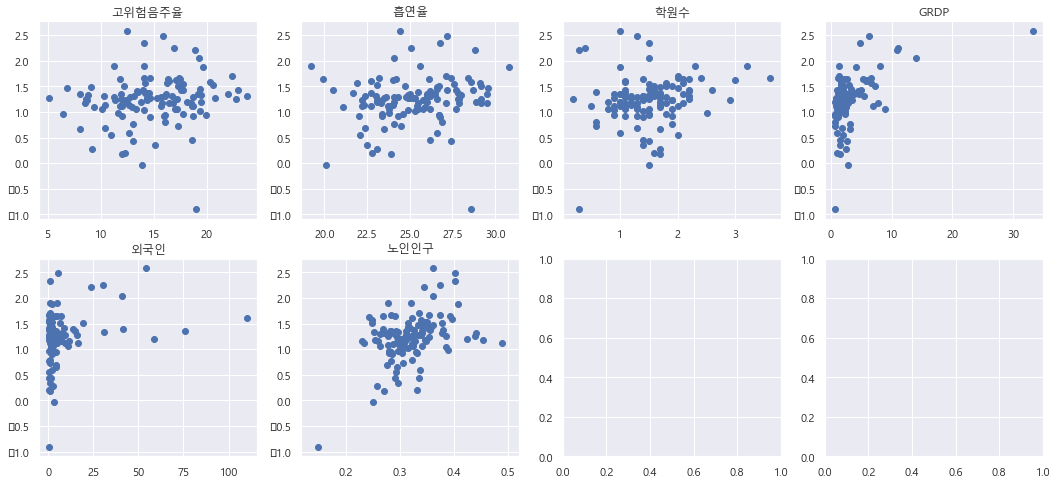

In [7]:
fig, ax = plt.subplots(2,4, figsize =(18,8))
ax[0,0].scatter(df2010['drink'],df2010['crime'])
ax[0,0].set_title('고위험음주율')
ax[0,1].scatter(df2010['smoke'],df2010['crime'])
ax[0,1].set_title('흡연율')
ax[0,2].scatter(df2010['academe'],df2010['crime'])
ax[0,2].set_title('학원수')
ax[0,3].scatter(df2010['grdp'],df2010['crime'])
ax[0,3].set_title('GRDP')
ax[1,0].scatter(df2010['foreigner'],df2010['crime'])
ax[1,0].set_title('외국인')
ax[1,1].scatter(df2010['grand'],df2010['crime'])
ax[1,1].set_title('노인인구')
plt.show()

In [8]:
df2010.describe(include = 'all').round(2)

,crime,drink,smoke,academe,foreigner,grand,grdp
count,117.00,117.00,117.00,117.00,117.00,117.00,117.00
mean,1.24,14.91,25.25,1.51,6.93,0.32,2.95
std,0.47,3.82,2.37,0.58,15.29,0.05,3.65
min,-0.90,5.10,19.20,0.20,0.09,0.15,0.62
25%,1.06,12.20,23.50,1.10,0.92,0.28,1.33
50%,1.27,14.70,25.30,1.50,1.83,0.31,1.92
75%,1.44,17.60,26.80,1.80,4.66,0.35,2.90
max,2.58,23.80,30.80,3.60,110.24,0.49,33.25


In [9]:
corr2010 = df2010.corr(method='spearman').round(2)
corr2010

,crime,drink,smoke,academe,foreigner,grand,grdp
crime,1.00,0.21,0.22,0.21,0.15,0.32,0.42
drink,0.21,1.00,0.28,-0.34,0.01,0.26,-0.07
smoke,0.22,0.28,1.00,-0.15,-0.06,0.21,-0.02
academe,0.21,-0.34,-0.15,1.00,-0.26,-0.27,0.14
foreigner,0.15,0.01,-0.06,-0.26,1.00,-0.10,0.49
grand,0.32,0.26,0.21,-0.27,-0.10,1.00,0.02
grdp,0.42,-0.07,-0.02,0.14,0.49,0.02,1.00


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


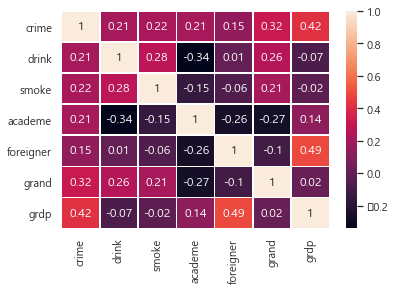

In [10]:
sn.heatmap(data = corr2010, annot=True, linewidths = 0.5)
plt.show()

In [347]:
class static():
    def number(self, a):
        print('표본개수 :{0}'.format(len(a)))
        print('평균 :{0}'.format(np.mean(a)))
        print('표준편차 :{0}'.format(np.std(a)))
        print('최대값 :{0}'.format(np.max(a)))
        print('최소값 :{0}'.format(np.min(a)))
        plt.figure(1)
        plt.hist(a)
        plt.show()

In [348]:
statics = static()

범죄율
표본개수 :117
평균 :1.2356774565056439
표준편차 :0.4728090647746968
최대값 :2.577732411882751
최소값 :-0.9030148775924102


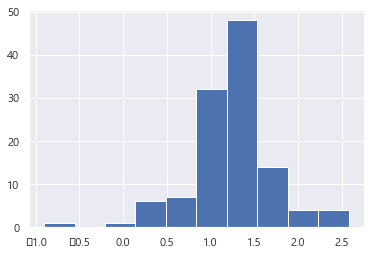

None


In [349]:
print('범죄율')
print(statics.number(df2010['crime']))

외국인 인구비중
표본개수 :117
평균 :6.933159126822612
표준편차 :15.222546117099837
최대값 :110.23727647303505
최소값 :0.08895506618268274


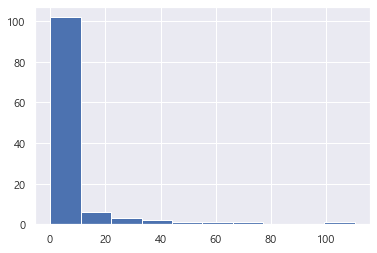

None


In [350]:
print('외국인 인구비중')
print(statics.number(df2010['foreigner']))

노인 인구비중
표본개수 :117
평균 :0.31970443813489274
표준편차 :0.05072364799500093
최대값 :0.4884515156762524
최소값 :0.14814366927318262


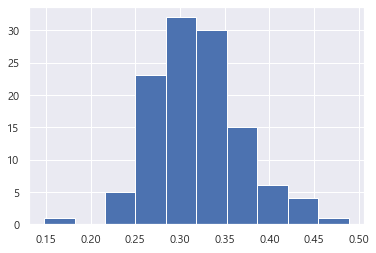

In [351]:
print('노인 인구비중')
statics.number(df2010['grand'])

흡연율
표본개수 :117
평균 :25.253846153846148
표준편차 :2.3630177164947606
최대값 :30.8
최소값 :19.2


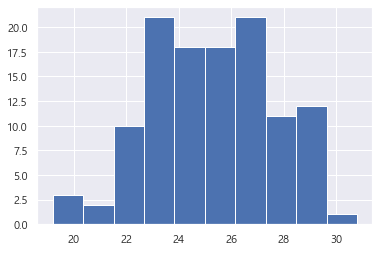

In [352]:
print('흡연율')
statics.number(df2010['smoke'])

고위험 음주율
표본개수 :117
평균 :14.910256410256405
표준편차 :3.8078054027925106
최대값 :23.8
최소값 :5.1


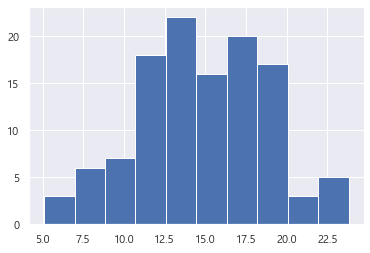

In [353]:
print('고위험 음주율')
statics.number(df2010['drink'])

GRDP
표본개수 :117
평균 :2.950374141746689
표준편차 :3.6366039905384957
최대값 :33.24750417852464
최소값 :0.6190639102031507


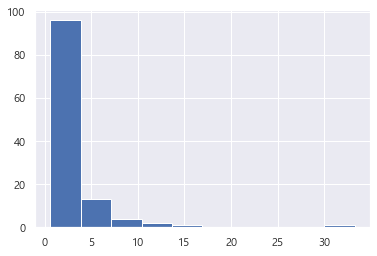

In [354]:
print('GRDP')
statics.number(df2010['grdp'])

학원수
표본개수 :117
평균 :1.5085470085470083
표준편차 :0.5744670736694726
최대값 :3.6
최소값 :0.2


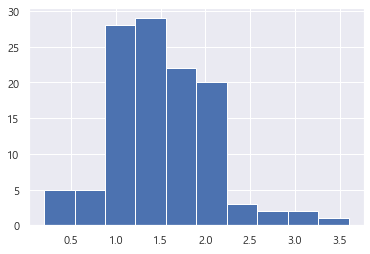

In [355]:
print('학원수')
statics.number(df2010['academe'])

# OLS
- log를 취했습니다.

In [14]:
X = ['academe','grand','grdp','foreigner','smoke','drink'] 
reg =sm.OLS((df2010['crime']),df2010[X],missing='drop').fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              236.2
Date:                Mon, 13 Jul 2020   Prob (F-statistic):                    8.64e-61
Time:                        11:52:36   Log-Likelihood:                         -45.354
No. Observations:                 117   AIC:                                      102.7
Df Residuals:                     111   BIC:                                      119.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
X = ['grdp','grand','academe'] 
reg1 =sm.OLS((df2010['crime']),df2010[X],missing='drop').fit()
print(reg1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              468.4
Date:                Mon, 13 Jul 2020   Prob (F-statistic):                    6.39e-64
Time:                        11:52:40   Log-Likelihood:                         -47.263
No. Observations:                 117   AIC:                                      100.5
Df Residuals:                     114   BIC:                                      108.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [402]:
#X1 = ['smoke','grand',
#          'grdp']
#reg1 =sm.OLS((df2010['crime']),df2010[X1],missing='drop').fit()
#print(reg1.summary())

In [13]:
features = 'academe + grand + grdp + foreigner + smoke + drink '

In [14]:
features

'academe + grand + grdp + foreigner + smoke + drink '

In [15]:
y, X = dmatrices( 'crime~'+ features, df2010, return_type='dataframe')

In [16]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif
vif['features'] = X.columns
vif

,VIF Factor
0,175.057834
1,1.213751
2,1.131807
3,1.287993
4,1.391386
5,1.114355
6,1.219286


,VIF Factor,features
0,175.057834,Intercept
1,1.213751,academe
2,1.131807,grand
3,1.287993,grdp
4,1.391386,foreigner
5,1.114355,smoke
6,1.219286,drink


In [17]:
name = ['Jarque-Beta','Chi^2 two-tail prob','Skew','Kurtosis']
jarque=sms.jarque_bera(reg1.resid)
lzip(name,jarque)
# Jarque-Beta가 낮아야함

[('Jarque-Beta', 36.56398628196268),
 ('Chi^2 two-tail prob', 1.1487651731156085e-08),
 ('Skew', -0.9756826901204237),
 ('Kurtosis', 4.921582168721601)]

((array([-2.51766264, -2.18797753, -1.99804211, -1.86093788, -1.75188371,
         -1.66039676, -1.58101103, -1.51049811, -1.44678472, -1.3884565 ,
         -1.33450338, -1.28417768, -1.23690959, -1.19225441, -1.149858  ,
         -1.1094335 , -1.07074507, -1.03359631, -0.99782179, -0.96328078,
         -0.92985244, -0.89743218, -0.86592881, -0.83526226, -0.80536182,
         -0.77616466, -0.74761465, -0.71966143, -0.69225957, -0.66536793,
         -0.6389491 , -0.6129689 , -0.58739603, -0.56220168, -0.53735927,
         -0.51284418, -0.48863352, -0.46470597, -0.44104159, -0.41762168,
         -0.39442864, -0.37144588, -0.34865769, -0.32604915, -0.30360607,
         -0.28131491, -0.25916267, -0.2371369 , -0.21522558, -0.19341713,
         -0.17170029, -0.15006414, -0.12849802, -0.1069915 , -0.08553436,
         -0.06411654, -0.04272809, -0.02135917,  0.        ,  0.02135917,
          0.04272809,  0.06411654,  0.08553436,  0.1069915 ,  0.12849802,
          0.15006414,  0.17170029,  0.

Text(0.5, 1.0, 'Residual Q-Q Plot')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


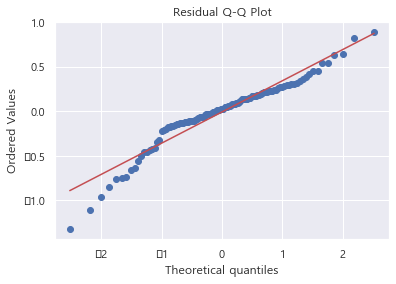

In [408]:
stats.probplot(reg.resid, dist = 'norm', plot = plt)
plt.title('Residual Q-Q Plot')

In [18]:
name = ['Lagrange multiplier static','p-value','f-value','f p-value']
BPtest = sms.het_breuschpagan(reg1.resid, reg1.model.exog)
lzip(name,BPtest)
#높아야 동분산 lucky

[('Lagrange multiplier static', 20.091106064311166),
 ('p-value', 4.3378222341808285e-05),
 ('f-value', 7.8781420304980125),
 ('f p-value', 8.013669615736525e-05)]

# White-Test가 오류가 납니다.

In [410]:
name = ['Lagrange multiplier static','p-value','f-value','f p-value']
Whitetest=sms.het_white(reg1.resid, reg1.model.exog)
lzip(name, Whitetest)

AssertionError: 

In [19]:
X2 = ['grand','grdp','academe']
reg2 =sm.OLS((df2010['crime']),df2010[X2],missing='drop').fit(cov_type = 'HC2')
print(reg2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              509.3
Date:                Sat, 11 Jul 2020   Prob (F-statistic):                    7.70e-66
Time:                        19:20:18   Log-Likelihood:                         -47.263
No. Observations:                 117   AIC:                                      100.5
Df Residuals:                     114   BIC:                                      108.8
Df Model:                           3                                                  
Covariance Type:                  HC2                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [20]:
name = ['LM-stat','LM:p-value','F-value','F:p-value']
bg_t = sm_diagnostic.acorr_breusch_godfrey(reg2,nlags = 2)
print(pd.DataFrame(lzip(name, bg_t)))
# 높아야함

            0          1
0     LM-stat  12.367075
1  LM:p-value   0.002063
2     F-value   4.446038
3   F:p-value   0.013885


In [21]:
reg3 = reg2.get_robustcov_results(cov_type = 'HAC',maxlags = 1)
print(reg3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              442.8
Date:                Sat, 11 Jul 2020   Prob (F-statistic):                    1.23e-62
Time:                        19:20:22   Log-Likelihood:                         -47.263
No. Observations:                 117   AIC:                                      100.5
Df Residuals:                     114   BIC:                                      108.8
Df Model:                           3                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [22]:
print('Ramsey Test : ',oi.reset_ramsey(reg2, degree=2))

Ramsey Test :  <F test: F=array([[0.231571]]), p=0.6312919176121006, df_denom=113, df_num=1>
